In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix,mean_squared_error,r2_score



In [3]:
df=pd.read_csv("survey lung cancer.csv")

In [4]:
df.head()



,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [5]:
from sklearn.preprocessing import LabelEncoder
print("Missing values in each column:\n", df.isnull().sum())
df = df.dropna()  
le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

print("Cleaned dataset:\n", df.head())


Missing values in each column:
 GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64
Cleaned dataset:
    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   69        1               2        2              1   
1       1   74        2               1        1              1   
2       0   59        1               1        1              2   
3       1   63        2               2        2              1   
4       0   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1   

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('LUNG_CANCER', axis=1)  
y = df['LUNG_CANCER'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (247, 15)
Testing set size: (62, 15)


In [7]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x_train=sd.fit_transform(X_train)
x_test=sd.transform(X_test)



In [16]:

from sklearn.linear_model import  LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred
y_test

288    1
9      1
57     1
60     1
25     1
      ..
198    1
195    1
210    1
224    1
158    1
Name: LUNG_CANCER, Length: 62, dtype: int32

In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.052459306167035896
R-squared: -0.68044644088405


In [10]:
from sklearn.linear_model import  LogisticRegression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)


In [11]:

accuracy = accuracy_score(y_test, y_pred_log)
print(f"Accuracy of Logistic Regression model: {accuracy:.2f}")




Accuracy of Logistic Regression model: 0.97


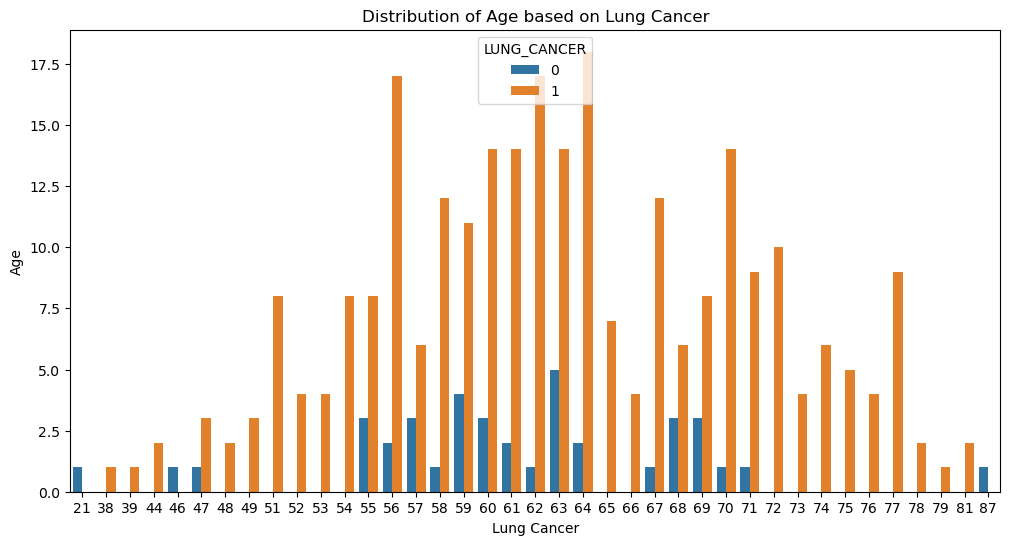

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(x='AGE',hue='LUNG_CANCER', data=df)
plt.title(f'Distribution of Age based on Lung Cancer')
plt.xlabel('Lung Cancer')
plt.ylabel('Age')
plt.show()

Confusion Matrix:
 [[ 1  1]
 [ 1 59]]


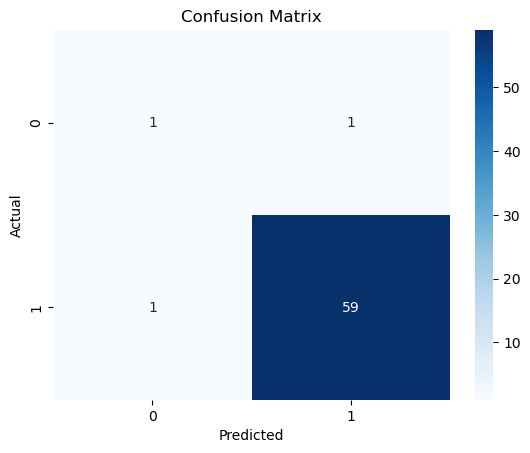

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:\n", conf_matrix)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [21]:
#For predicting the new daata...

import warnings
warnings.filterwarnings("ignore")

import random
fg = pd.DataFrame({
    'GENDER': random.choices(['M', 'F'], k=10),
    'AGE': np.random.randint(20, 80, size=10),
    'SMOKING': np.random.randint(0, 3, size=10),
    'YELLOW_FINGERS': np.random.randint(0, 3, size=10),
    'ANXIETY': np.random.randint(0, 3, size=10),
    'PEER_PRESSURE': np.random.randint(0, 3, size=10),
    'CHRONIC DISEASE': np.random.randint(0, 3, size=10),
    'FATIGUE': np.random.randint(0, 3, size=10),
    'ALLERGY': np.random.randint(0, 3, size=10),
    'WHEEZING': np.random.randint(0, 3, size=10),
    'ALCOHOL CONSUMING': np.random.randint(0, 3, size=10),
    'COUGHING': np.random.randint(0, 3, size=10),
    'SHORTNESS OF BREATH': np.random.randint(0, 3, size=10),
    'SWALLOWING DIFFICULTY': np.random.randint(0, 3, size=10),
    'CHEST PAIN': np.random.randint(0, 3, size=10)
})




Accuracy on Random Data: 0.60
Confusion Matrix:
 [[5 0]
 [4 1]]


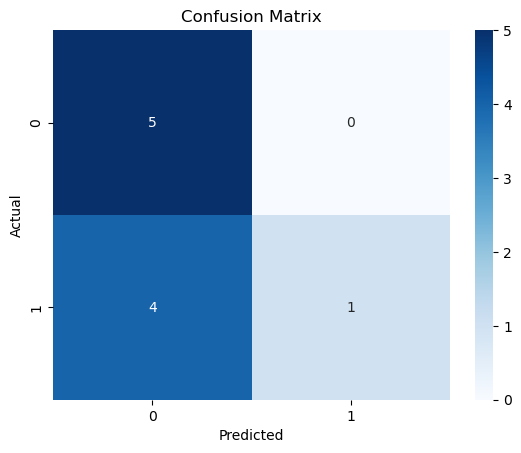

In [24]:

fg['LUNG_CANCER'] = random.choices(['YES', 'NO'], k=10)

fg['GENDER'] = LabelEncoder().fit_transform(fg['GENDER'])
fg['LUNG_CANCER'] = LabelEncoder().fit_transform(fg['LUNG_CANCER'])


Xtr= fg.drop('LUNG_CANCER', axis=1)
ytr = fg['LUNG_CANCER']

y_pred1 = log_reg.predict(Xtr)

random_accuracy = accuracy_score(ytr, y_pred1)
print(f"Accuracy on Random Data: {random_accuracy:.2f}")

conf_matrix = confusion_matrix(ytr,y_pred1)
print("Confusion Matrix:\n", conf_matrix)


sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
